### Loading the DataSet

In [1]:
# import necessary libraries
import os
import pandas as pd
import numpy as np

# load Data
data_path = os.path.join(os.getcwd(), "..", "data", "weatherAUS.csv")
df = pd.read_csv(data_path)
pd.options.display.max_columns = 100

# ensure data has been loaded
print(df.head())

# some measurement statistics
r_count_initial = df.shape[0]
c_count_initial = df.shape[1]


         Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0  2008-12-01   Albury     13.4     22.9       0.6          NaN       NaN   
1  2008-12-02   Albury      7.4     25.1       0.0          NaN       NaN   
2  2008-12-03   Albury     12.9     25.7       0.0          NaN       NaN   
3  2008-12-04   Albury      9.2     28.0       0.0          NaN       NaN   
4  2008-12-05   Albury     17.5     32.3       1.0          NaN       NaN   

  WindGustDir  WindGustSpeed WindDir9am WindDir3pm  WindSpeed9am  \
0           W           44.0          W        WNW          20.0   
1         WNW           44.0        NNW        WSW           4.0   
2         WSW           46.0          W        WSW          19.0   
3          NE           24.0         SE          E          11.0   
4           W           41.0        ENE         NW           7.0   

   WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  \
0          24.0         71.0         22.0      

### Understand the Data (Scoping)

What is the goal/origin of the dataset:
* predicting tommorrows rain
* data is from historical weather data from the last 10 years
* 'RainTomorrow' == Yes if the rain >1mm

neccessary clarifications:
* What is the problem we are trying to solve?
* why is it important for our business to solve this problem (big picture)?
* Where will we use ML in the process?
* How has the problem been solved before?
* How will we use the results of the model?
* Which is the worst error our model can make?
* How will we measure the success of the model?


| Name                | Description                                                          | Measurement Unit | Data Type | Possible Values/Range                                 |
|---------------------|----------------------------------------------------------------------|------------|------------------|--------------------------------------------------------|
| Date          | The date of observation || date | as timestamp in the Format "YYYY-mm-dd" |
| Location      | City ||String| |
| MinTemp       | The minimum temperature in degrees celsius || float ||
| MaxTemp       | The maximum temperature in degrees celsius || float ||
| Rainfall      | The amount of rainfall recorded for the day in mm|| float ||
| Evaporation   | The so-called Class A pan evaporation (mm) in the 24 hours to 9am|| float ||
| Sunshine      | The number of hours of bright sunshine in the day.|| float ||
| WindGustDir   | The direction of the strongest wind gust in the 24 hours to midnight || String | ['N', 'NE', 'NNE'] |
| WindGustSpeed | The speed (km/h) of the strongest wind gust in the 24 hours to midnight ||||
| WindDir9am    | The direction of the Wind ||||
| WindDir3pm    | The direction of the Wind ||||
| WindSpeed9am  | Wind speed (km/hr) averaged over 10 minutes prior to 9am ||||
| WindSpeed3pm  | Wind speed (km/hr) averaged over 10 minutes prior to 3pm ||||
| Humidity9am   | Humidity (percent) at 9am || float | %|
| Humidity3pm   | Humidity (percent) at 3pm || float | %|
| Pressure9am   | Atmospheric pressure (hpa) reduced to mean sea level at 9am||||
| Pressure3pm   | Atmospheric pressure (hpa) reduced to mean sea level at 3am||||
| Cloud9am      | Fraction of sky obscured by cloud at 9am. This is measured in "oktas", which are a unit of eigths. It records how many eigths of the sky are obscured by cloud. A 0 measure indicates completely clear sky whilst an 8 indicates that it is completely overcast.|| int | values between 1 to 9 |
| Cloud3pm      | raction of sky obscured by cloud (in "oktas": eighths) at 3pm. See Cload9am for a description of the values || int | values between 1 to 9 |
| Temp9am       | Temperature (degrees C) at 9pm ||||
| Temp3pm       | Temperature (degrees C) at 3pm ||||
| RainToday     | Boolean: 1 if precipitation (mm) in the 24 hours to 9am exceeds 1mm, otherwise 0 || bool ||
| RainTomorrow  | The amount of next day rain in mm. Used to create response variable RainTomorrow. A kind of measure of the "risk".||||


In [2]:
# first overview of the data set
print("\n--- df.info() ---\n")
print(df.info())


--- df.info() ---

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am 

In [3]:
# arithmetic analysis
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


In [4]:
# prepare qualitative and quantitative columns
cat_cols = []
num_cols = []

for feature in df.columns:
    if df[feature].dtype!="object":
        num_cols.append(feature)
    else:
        cat_cols.append(feature)

In [5]:
# importing necessary libraries for plots
import matplotlib.pyplot as plt
import seaborn as sns

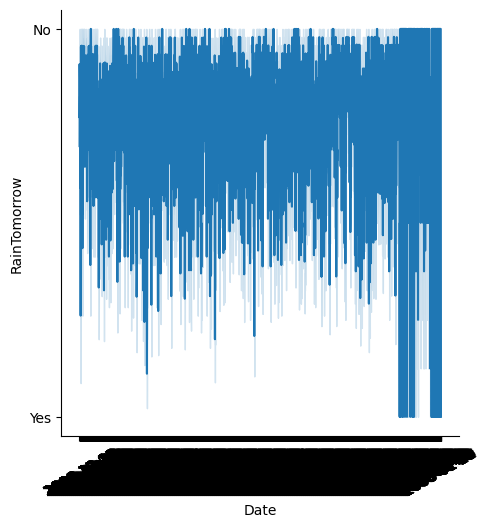

In [6]:
# create plots for each feature
# Accounting for the mean, 95% Accuracy
for feature_name in df.columns:
    sns.relplot(
        data=df, kind="line",
        x=feature_name, y="RainTomorrow",
        legend="brief"
    )
    
    plt.xticks(rotation=30)
    plt.show()
    break

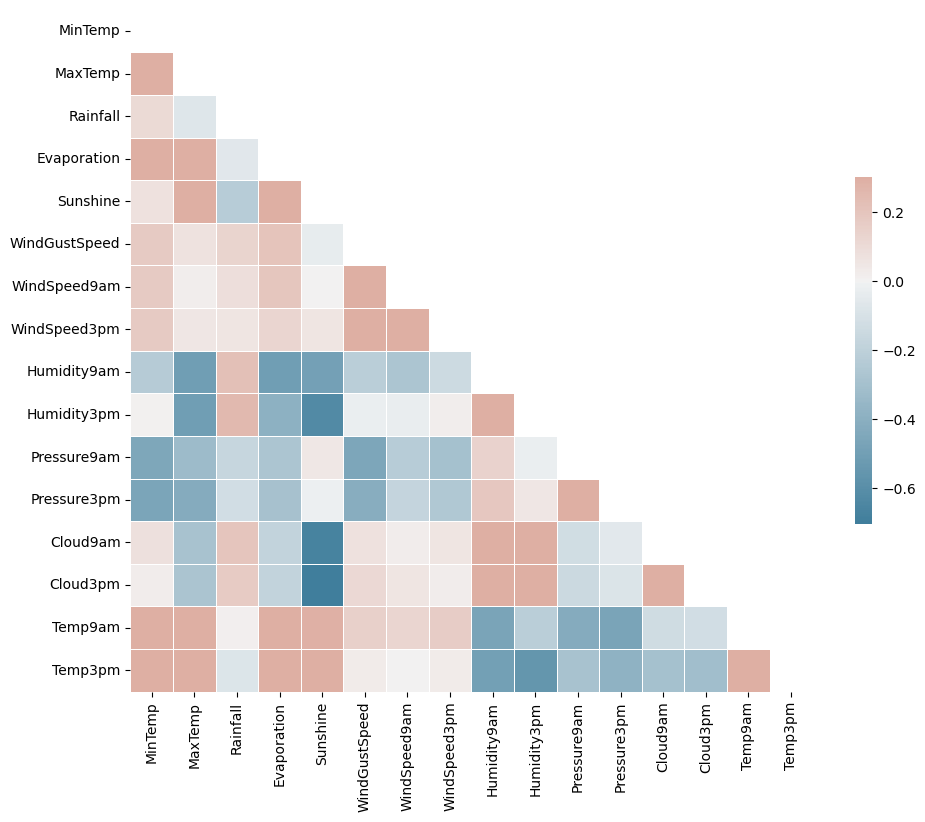

In [7]:
# printing correlation map
# Correlation map cannot handle qualitaive data
corr = df[num_cols].corr()

# Compute the correlation matrix
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
        square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.show()

<b>Conclusion:</b>
- rainTomorrow => evaporation slightly higher
- rainTomorrow => humidity slightly higher
- rainTomorrow => pressure slightly lower (<985 HPasc)

### Modeling the Data

#### Data Transformation
What are the relevant qualitative columns that need to be transformed to quantitative data?
Possible columns: 
* Date
* Location
* WindGustDir
* WindDir9am/3pm
* RainToday
* RainTomorrow

In [8]:
# quantitative data
print(df[num_cols].head())

print("\n--------------------\n")

# qualitative data
print(df[cat_cols].head())

   MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  WindGustSpeed  \
0     13.4     22.9       0.6          NaN       NaN           44.0   
1      7.4     25.1       0.0          NaN       NaN           44.0   
2     12.9     25.7       0.0          NaN       NaN           46.0   
3      9.2     28.0       0.0          NaN       NaN           24.0   
4     17.5     32.3       1.0          NaN       NaN           41.0   

   WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  \
0          20.0          24.0         71.0         22.0       1007.7   
1           4.0          22.0         44.0         25.0       1010.6   
2          19.0          26.0         38.0         30.0       1007.6   
3          11.0           9.0         45.0         16.0       1017.6   
4           7.0          20.0         82.0         33.0       1010.8   

   Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  
0       1007.1       8.0       NaN     16.9     21.8  
1       1007.8       NaN      

In [9]:
# transform qualitative (nominale) data into quantitative data
from sklearn.preprocessing import OneHotEncoder
encoded_df = pd.DataFrame()

# rainToday + rainTomorrow => 1/0
encoded_df['RainToday_encoded']=df['RainToday'].map({"No":0,"Yes":1})
encoded_df['RainTomorrow_encoded']=df['RainTomorrow'].map({"No":0, "Yes":1})

# WindGustDir WindDir9am WindDir3pm => Fraction of 360° 
degrees_map={'N':0, 'NNE':22.5,"NE":45,"ENE":67.5, 'E':90,'ESE':112.5, 'SE':135,'SSE':157.5, 'S':180,'SSW':202.5, 'SW':225,'WSW':247.5, 'W':270,'WNW':292.5,'NW':315,'NNW':337.5}
col_names = ['WindGustDir','WindDir9am','WindDir3pm']
for col_name in col_names:
    encoded_df[col_name + '_encoded'] = df[col_name].map(degrees_map)
    
# location as FrequencyEnc
freq_map = df['Location'].value_counts()
encoded_df['Location_encoded'] = df['Location'].map(freq_map)
# checking result
print("\n--- encoded_df.info() ---\n")
print(encoded_df.info())

# date => per season
# map the months to the season in dependency to the southern hemisphere australia is in
from datetime import date, datetime

Y = 2000 # dummy leap year to allow input X-02-29 (leap day)
seasons = [('winter', (date(Y,  6,  1),  date(Y,  8, 31))),
           ('spring', (date(Y,  9, 1),  date(Y,  11, 30))),
           ('summer', (date(Y,  12, 1),  date(Y,  12, 31))),
           ('summer', (date(Y, 1, 1),  date(Y, 2, 29))),
           ('autumn', (date(Y,  3, 1),  date(Y, 5, 31)))]

def get_season(date_string):
    d = datetime.strptime(date_string, '%Y-%m-%d')
    if isinstance(d, datetime):
        d = d.date()
    d = d.replace(year=Y)
    return next(season for season, (start, end) in seasons
                if start <= d <= end)
df['DateSeason'] = df['Date'].apply(get_season)
cat_cols.append('DateSeason')

encoder = OneHotEncoder(drop='first', sparse_output=False) 
encoded_cols = encoder.fit_transform(df[['DateSeason']])
encoded_season_df = pd.DataFrame(encoded_cols, columns=encoder.get_feature_names_out(), index=df.index)
encoded_df = pd.merge(encoded_df, encoded_season_df, left_index=True, right_index=True)
# checking result
print("\n--- encoded_df.info() ---\n")
print(encoded_df.info())

# other columns
encoder = OneHotEncoder(drop='first', sparse_output=False) 
encoded_cols = encoder.fit_transform(df[cat_cols].drop(['Location','Date','WindGustDir','WindDir9am','WindDir3pm','DateSeason','RainToday','RainTomorrow'],axis=1))
encoded_other_df = pd.DataFrame(encoded_cols, columns=encoder.get_feature_names_out(), index=df.index)
encoded_df = pd.merge(encoded_df, encoded_other_df, left_index=True, right_index=True)
# checking result
print("\n--- encoded_df.info() ---\n")
print(encoded_df.info())


--- encoded_df.info() ---

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 6 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   RainToday_encoded     142199 non-null  float64
 1   RainTomorrow_encoded  142193 non-null  float64
 2   WindGustDir_encoded   135134 non-null  float64
 3   WindDir9am_encoded    134894 non-null  float64
 4   WindDir3pm_encoded    141232 non-null  float64
 5   Location_encoded      145460 non-null  int64  
dtypes: float64(5), int64(1)
memory usage: 6.7 MB
None

--- encoded_df.info() ---

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 9 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   RainToday_encoded     142199 non-null  float64
 1   RainTomorrow_encoded  142193 non-null  float64
 2   WindGustDir_encoded   135134 non-null  f

Hint regarding the above transformation:
- OHE should only be used where neccessary (https://www.geeksforgeeks.org/ml-one-hot-encoding/) - Alternative "Label ENcoding":
    - Target (Mean) Encoding =>
    - Binary Encoding => mean
    - Ordinal Encoding => Tshirt Sizes: M=1, L=2, etc.; low=1, middle=2, High=3
    - Frequency Encoding => replace category with frequency in the set


Ideas:
- converting the wind direction 'WindGustDir', etc. to degrees (where N=0, E=90, S=180, W=270°)
- use Boolean values as BinaryEncoding (RainToday + RainTomorrow)
- convert 'Location' to a number representing the frequency of value in the dataset (frequency encoding)
- separate the date vaues into their seasons
  => https://study.com/academy/lesson/seasonal-weather-definition-types.html
  => https://en.wikipedia.org/wiki/Season

In [10]:
# merge transformed data (now numerical) with original (numerical) data
df = pd.merge(df, encoded_df, left_index=True, right_index=True)

# checking result of merge
print("\n--- df.info() ---\n")
print(df.info())


--- df.info() ---

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 33 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Date                  145460 non-null  object 
 1   Location              145460 non-null  object 
 2   MinTemp               143975 non-null  float64
 3   MaxTemp               144199 non-null  float64
 4   Rainfall              142199 non-null  float64
 5   Evaporation           82670 non-null   float64
 6   Sunshine              75625 non-null   float64
 7   WindGustDir           135134 non-null  object 
 8   WindGustSpeed         135197 non-null  float64
 9   WindDir9am            134894 non-null  object 
 10  WindDir3pm            141232 non-null  object 
 11  WindSpeed9am          143693 non-null  float64
 12  WindSpeed3pm          142398 non-null  float64
 13  Humidity9am           142806 non-null  float64
 14  Humidity3pm           140953 non

In [11]:
# checking data
df.loc[(df['Location'] != 'Albury')]

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,DateSeason,RainToday_encoded,RainTomorrow_encoded,WindGustDir_encoded,WindDir9am_encoded,WindDir3pm_encoded,Location_encoded,DateSeason_spring,DateSeason_summer,DateSeason_winter
3040,2009-01-01,BadgerysCreek,13.3,34.2,0.0,NaN,NaN,W,61.0,NNE,NaN,11.0,NaN,67.0,NaN,1005.6,NaN,NaN,NaN,21.0,NaN,No,No,summer,0.0,0.0,270.0,22.5,NaN,3009,0.0,1.0,0.0
3041,2009-01-02,BadgerysCreek,14.7,26.1,0.0,NaN,NaN,SE,46.0,SE,SE,7.0,24.0,59.0,54.0,1012.9,1013.5,NaN,NaN,20.7,22.2,No,No,summer,0.0,0.0,135.0,135.0,135.0,3009,0.0,1.0,0.0
3042,2009-01-03,BadgerysCreek,13.6,22.3,0.0,NaN,NaN,NNE,30.0,ESE,NE,6.0,15.0,57.0,51.0,1021.9,1019.2,NaN,NaN,17.9,21.7,No,No,summer,0.0,0.0,22.5,112.5,45.0,3009,0.0,1.0,0.0
3043,2009-01-04,BadgerysCreek,17.7,31.2,0.0,NaN,NaN,NE,39.0,NNE,N,9.0,15.0,62.0,43.0,1018.7,1013.6,NaN,NaN,22.0,30.6,No,No,summer,0.0,0.0,45.0,22.5,0.0,3009,0.0,1.0,0.0
3044,2009-01-05,BadgerysCreek,15.5,38.8,0.0,NaN,NaN,SW,50.0,NNE,W,7.0,17.0,67.0,19.0,1013.2,1007.6,NaN,NaN,22.7,37.6,No,No,summer,0.0,0.0,225.0,22.5,270.0,3009,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,ENE,13.0,11.0,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No,winter,0.0,0.0,90.0,135.0,67.5,1578,0.0,0.0,1.0
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,N,13.0,9.0,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No,winter,0.0,0.0,337.5,135.0,0.0,1578,0.0,0.0,1.0
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,WNW,9.0,9.0,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No,winter,0.0,0.0,0.0,135.0,292.5,1578,0.0,0.0,1.0
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,N,13.0,7.0,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No,winter,0.0,0.0,135.0,157.5,0.0,1578,0.0,0.0,1.0


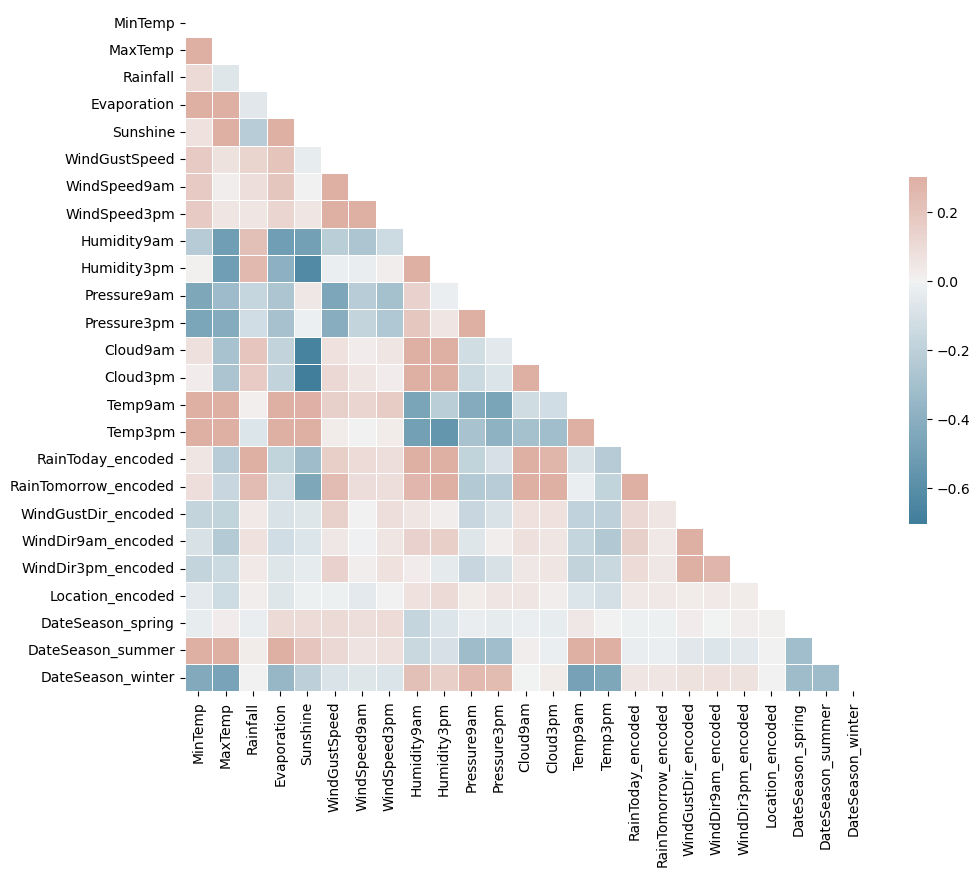

In [12]:
# printing correlation map after transformation
corr = df.drop(cat_cols, axis=1).corr()

# Compute the correlation matrix
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
        square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.show()

#### Handle NaN Values

Affected are all columns except Date and Location.
Affected Columns: MinTemp, MaxTemp, Rainfall, Evaporation, Sunshine, WindGustDir, WindGustSpeed, WindDir9am, WindDir3pm, WindSpeed9am, WindSpeed3pm, Humidity9am, Humidity3pm, Pressure9am, Pressure3pm, Cloud9am, Cloud3pm, Temp9am, Temp3pm, RainToday, RainTomorrow

columns where "NaN" could be ignored:

columns we should remove because of "NaN":
- RainToday => no median/mean possible
- RainTomorrow => otherwise no evaluation of prediction possible
- Rainfall => propable no mean possible - is not continous enough

columns we should alter because of "NaN":
- MinTemp, MaxTemp, Evaporation, WindDir9am, WindDir3pm, WindSpeed9am, WindSpeed3pm, Humidity9am, Humidity3pm, Pressure9am, Pressure3pm, Cloud9am, Cloud3pm, Temp9am, Temp3pm => mean based upon last and next day
  (How continous is the data?)
- WindGustDir => median of WindDir9am and WindDir3pm
- WindGustSpeed => median of WindSpeed9am and WindSpeed3pm
- Sunshine


In [13]:
# get all lines with NaN values
df[df.isnull().any(axis=1)].info()

<class 'pandas.core.frame.DataFrame'>
Index: 89040 entries, 0 to 145459
Data columns (total 33 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  89040 non-null  object 
 1   Location              89040 non-null  object 
 2   MinTemp               87555 non-null  float64
 3   MaxTemp               87779 non-null  float64
 4   Rainfall              85779 non-null  float64
 5   Evaporation           26250 non-null  float64
 6   Sunshine              19205 non-null  float64
 7   WindGustDir           78714 non-null  object 
 8   WindGustSpeed         78777 non-null  float64
 9   WindDir9am            78474 non-null  object 
 10  WindDir3pm            84812 non-null  object 
 11  WindSpeed9am          87273 non-null  float64
 12  WindSpeed3pm          85978 non-null  float64
 13  Humidity9am           86386 non-null  float64
 14  Humidity3pm           84533 non-null  float64
 15  Pressure9am           7

In [14]:
# Removing rows with NaN in RainToday, RainTomorrow, Rainfall
# ~ 5000 rows are dropped
df.dropna(subset=['RainToday','RainTomorrow','Rainfall'], inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 140787 entries, 0 to 145458
Data columns (total 33 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Date                  140787 non-null  object 
 1   Location              140787 non-null  object 
 2   MinTemp               140319 non-null  float64
 3   MaxTemp               140480 non-null  float64
 4   Rainfall              140787 non-null  float64
 5   Evaporation           81093 non-null   float64
 6   Sunshine              73982 non-null   float64
 7   WindGustDir           131624 non-null  object 
 8   WindGustSpeed         131682 non-null  float64
 9   WindDir9am            131127 non-null  object 
 10  WindDir3pm            137117 non-null  object 
 11  WindSpeed9am          139732 non-null  float64
 12  WindSpeed3pm          138256 non-null  float64
 13  Humidity9am           139270 non-null  float64
 14  Humidity3pm           137286 non-null  float64
 15  Press

In [15]:
# count Nan Values
df.isna().sum()

# guessing NaN Values where possible
# @TODO: 
# delay for later - possible enhancement
# drop every NaN value for now:
#df.dropna(inplace=True)
#df.info()

# cloud
# @TODO

# evaporastion
# @TODO

# sunshine
# @TODO

Date                        0
Location                    0
MinTemp                   468
MaxTemp                   307
Rainfall                    0
Evaporation             59694
Sunshine                66805
WindGustDir              9163
WindGustSpeed            9105
WindDir9am               9660
WindDir3pm               3670
WindSpeed9am             1055
WindSpeed3pm             2531
Humidity9am              1517
Humidity3pm              3501
Pressure9am             13743
Pressure3pm             13769
Cloud9am                52625
Cloud3pm                56094
Temp9am                   656
Temp3pm                  2624
RainToday                   0
RainTomorrow                0
DateSeason                  0
RainToday_encoded           0
RainTomorrow_encoded        0
WindGustDir_encoded      9163
WindDir9am_encoded       9660
WindDir3pm_encoded       3670
Location_encoded            0
DateSeason_spring           0
DateSeason_summer           0
DateSeason_winter           0
dtype: int

In [16]:
# show percentage that has been eliminated because of data clearance
r_count = df.shape[0]
c_count = df.shape[1]
print('remaining rows after clearance:\t\t {:n}\t ({:+.2%})'.format(r_count, ((r_count / r_count_initial) - 1)))
print('remaining columns after clearance:\t {:n}\t ({:+.2%})'.format(c_count, ((c_count / c_count_initial) - 1)))

# show the value of the correlations with the highes+lowest value (negative correlation)
# where +0.6 positive correlation and -0.6 negative correlation
corr = df.drop(cat_cols, axis=1).corr()
#print(corr['RainTomorrow_encoded'])
CORR_THRESHOLD = 0.3
corr_rel = corr.where(
    (corr['RainTomorrow_encoded'] >= CORR_THRESHOLD) | 
    (corr['RainTomorrow_encoded'] <= -CORR_THRESHOLD ))
print('strongest correlations (+/- {}): \n'.format(CORR_THRESHOLD))
print(corr_rel['RainTomorrow_encoded'].dropna())

remaining rows after clearance:		 140787	 (-3.21%)
remaining columns after clearance:	 33	 (+43.48%)
strongest correlations (+/- 0.3): 

Sunshine               -0.451820
Humidity3pm             0.447834
Cloud9am                0.316592
Cloud3pm                0.382418
RainToday_encoded       0.313097
RainTomorrow_encoded    1.000000
Name: RainTomorrow_encoded, dtype: float64


### Analyse
Abhängigkeiten scheinen folgende zu sein:
* Regen bedingt durch => Temp, Pressure, Sunshine
* Regen neg. bedingt durch => Cloud, Humidity

### Create the model

In [20]:
RSEED = 42

# define X and Y
X = df.drop(cat_cols,axis=1)
y = df['RainTomorrow_encoded'] # use encoded

#### Prepare training and test data

In [21]:
# train and test set
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=RSEED)

#### Scaling
Getting rid of deviation differences


In [22]:
from sklearn.preprocessing import MinMaxScaler
# create an object of the class MinMaxScaler
scaler = MinMaxScaler()
# call the fit_transform method on the training data and convert it back to a DataFrame
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns, index=X_train.index)
# Calling the transform method on the test data and convert it back to a DataFrame
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns, index=X_test.index)

#### Baseline-Model
@TODO

#### AI Model